In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
headlines = pd.read_csv("data.csv")
headlines.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top23,Top24,Top25,combined,combined_text,sentiment_score,7_day_avg,30_day_avg,daily_return,volatility_30
0,30,2008-09-22,0,"['russian', 'navy', 'sails', 'venezuela']","['oil', 'prices', 'shoot', 'num', 'barrel', 'b...","['russia', 'successfully', 'fired', 'new', 'in...","['pakistans', 'top', 'leaders', 'islamabad', '...","['num', 'year', 'ban', 'italys', 'prime', 'min...","['nearly', 'num', 'chinese', 'children', 'sick...","['mariam', 'ayyad', 'num', 'attempted', 'block...",...,"['heads', 'starting', 'role', 'china', 'tainte...","['russian', 'ambassador', 'czechs', 'selling',...","['merchant', 'death', 'appears', 'thai', 'cour...","['russian', 'navy', 'sails', 'venezuela', 'boi...",russian navy sails venezuela oil prices shoot ...,0.007245,17669.762835,17736.087695,-0.003745,0.009846
1,31,2008-09-23,0,"['us', 'num', 'billion', 'money', 'allocated',...","['breaking', 'shooting', 'school', 'finland']","['noida', 'ceo', 'beaten', 'death', 'sacked', ...","['japan', 'starts', 'work', '9b', 'space', 'el...","['venezuela', 'welcomes', 'russian', 'warships...","['scenes', 'india', 'pics']","['methane', 'escaping', 'arctic', 'sea', 'bed']",...,"['tourists', 'taken', 'hostage', 'egypt', 'rel...","['bush', 'ahmadinejad', 'speak', 'un']","['workers', 'allegedly', 'beat', 'ceo', 'death...","['us', 'num', 'billion', 'money', 'allocated',...",us num billion money allocated reconstruction ...,-0.116667,17620.248326,17722.641992,0.005232,0.009910
2,32,2008-09-24,0,"['iran', 'leader', 'says', 'american', 'empire...","['global', 'corruption', 'index', 'somalia', '...","['systems', 'go', 'chinas', 'manned', 'space',...","['wreckage', 'suspected', 'us', 'spy', 'plane'...","['children', 'targets', 'nigerian', 'witch', '...","['n', 'korea', 'nuclear', 'seals', 'removed']","['north', 'korea', 'expels', 'iaea', 'monitors...",...,"['four', 'fallacies', 'russogeorgian', 'confli...","['georgias', 'president', 'announces', 'govern...","['cold', 'war', 'lessons', 'today']","['iran', 'leader', 'says', 'american', 'empire...",iran leader says american empire near collapse...,-0.133894,17577.632813,17717.152018,0.000192,0.009629
3,33,2008-09-25,1,"['russian', 'woman', 'caught', 'redhanded', 'd...","['russia', 'loan', 'chavez', 'us', 'num', 'bil...","['henry', 'rollins', 'israel', 'kids', 'inheri...","['stopping', 'financial', 'crisis', 'swedish',...","['pakistani', 'troops', 'fire', 'us', 'helicop...","['ahmadinejad', 'american', 'empire', 'nearing...","['internet', 'run', 'ip', 'addresses', 'num', ...",...,"['venezuelas', 'chavez', 'sees', 'america', 's...","['indonesia', 'cleaning', 'corruption']","['drink', 'enough', 'water']","['russian', 'woman', 'caught', 'redhanded', 'd...",russian woman caught redhanded drinking orange...,-0.041126,17557.518694,17727.185026,0.010310,0.009334
4,34,2008-09-26,1,"['japanese', 'space', 'tourist', 'paid', 'spac...","['frances', 'top', 'diplomat', 'said', 'thursd...","['xinhua', 'runs', 'spacewalk', 'story', 'astr...","['somali', 'pirates', 'seize', 'num', 'tankswh...","['new', 'coup', 'detat', 'rumblings', 'venezue...","['swedish', 'government', 'says', 'proposing',...","['pakistan', 'kills', 'num', 'militants']",...,"['chinas', 'astronauts', 'orbit', 'prepare', '...","['government', 'questionnaires', 'stir', 'unea...","['harper', 'hunt']","['japanese', 'space', 'tourist', 'paid', 'spac...",japanese space tourist paid space adventures 2...,0.041883,17533.128627,17740.354362,-0.009903,0.009054


In [3]:
# Split the dataset into train and test set, based on the dates.
# This is because stock prices and news headlines are a time-series data and rely on the date context
headlines_train = headlines[headlines['Date'] < '2014-07-15']
headlines_test = headlines[headlines['Date'] > '2014-07-14']

headlines_train_list = headlines_train['combined']

# Word Frequency Correlation
We first used a model trained using the frequency of each word to see if there is any correlation between word frequency and stock price movement.

In [4]:
vectorize= CountVectorizer(min_df=0.01, max_df=0.8) 
news_vector = vectorize.fit_transform(headlines_train_list)
print("Word distribution by frequency: " , news_vector.shape)

lr=LogisticRegression()
model = lr.fit(news_vector, headlines_train["Label"])

headlines_test_list = headlines_test['combined']

headlines_test_vector = vectorize.transform(headlines_test_list) 
predictions = model.predict(headlines_test_vector)

pd.crosstab(headlines_test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

accuracy = accuracy_score(headlines_test['Label'], predictions)
print("Accuracy:", accuracy)

words = vectorize.get_feature_names_out()
coef = model.coef_.tolist()[0]
coef_df = pd.DataFrame({'Word' : words,'Coefficient' : coef})  

coef_df = coef_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coef_df.head()

Word distribution by frequency:  (1462, 4557)
Accuracy: 0.5030181086519114


,Word,Coefficient
2714,nation,0.613246
2025,hospital,0.582487
1620,fears,0.575925
2761,nigeria,0.561023
2337,lack,0.526416


# Decision Classification Tree
Our decision tree takes the sentiment scores of each day's headlines and predicts the stock price movement.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from sklearn.externals.six import StringIO  

# Example dataset (replace with your data loading code)
data = pd.read_csv('data.csv')
X = pd.DataFrame(data['sentiment_score']) # Features
y = pd.DataFrame(data['Label']) # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Train Set: (1567, 1) (1567, 1)
Test Set: (392, 1) (392, 1)


[Text(0.4230769230769231, 0.875, 'Sentiment <= -0.031\ngini = 0.494\nsamples = 392\nvalue = [175, 217]\nclass = 0'),
 Text(0.15384615384615385, 0.625, 'Sentiment <= -0.143\ngini = 0.498\nsamples = 88\nvalue = [47, 41]\nclass = 1'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 0'),
 Text(0.23076923076923078, 0.375, 'Sentiment <= -0.086\ngini = 0.496\nsamples = 86\nvalue = [47, 39]\nclass = 1'),
 Text(0.15384615384615385, 0.125, 'gini = 0.415\nsamples = 17\nvalue = [12, 5]\nclass = 1'),
 Text(0.3076923076923077, 0.125, 'gini = 0.5\nsamples = 69\nvalue = [35, 34]\nclass = 1'),
 Text(0.6923076923076923, 0.625, 'Sentiment <= -0.023\ngini = 0.488\nsamples = 304\nvalue = [128, 176]\nclass = 0'),
 Text(0.5384615384615384, 0.375, 'Sentiment <= -0.028\ngini = 0.278\nsamples = 18\nvalue = [3, 15]\nclass = 0'),
 Text(0.46153846153846156, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]\nclass = 0'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0\nsamples = 7\

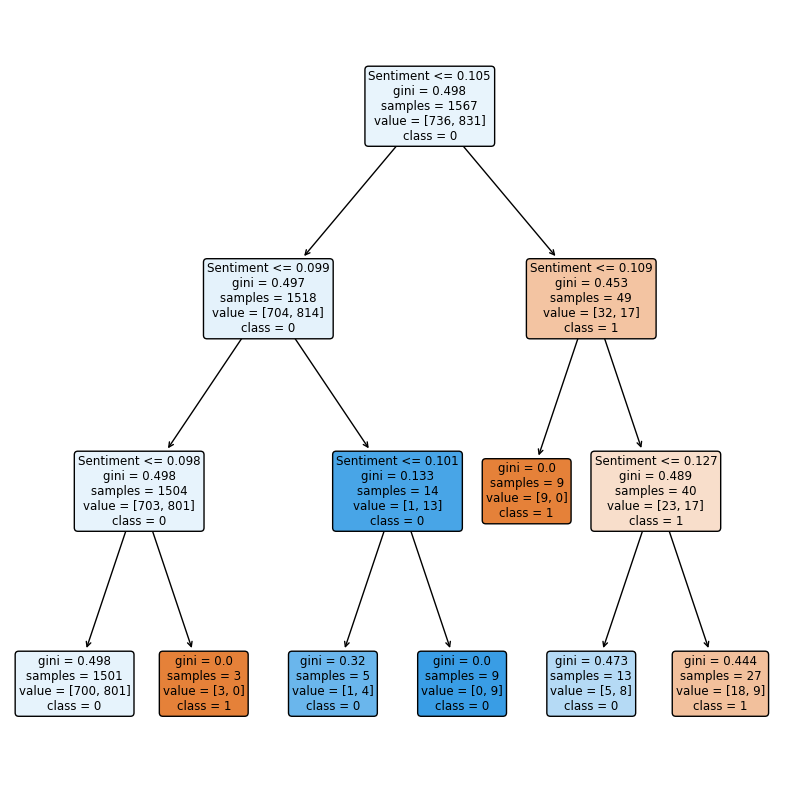

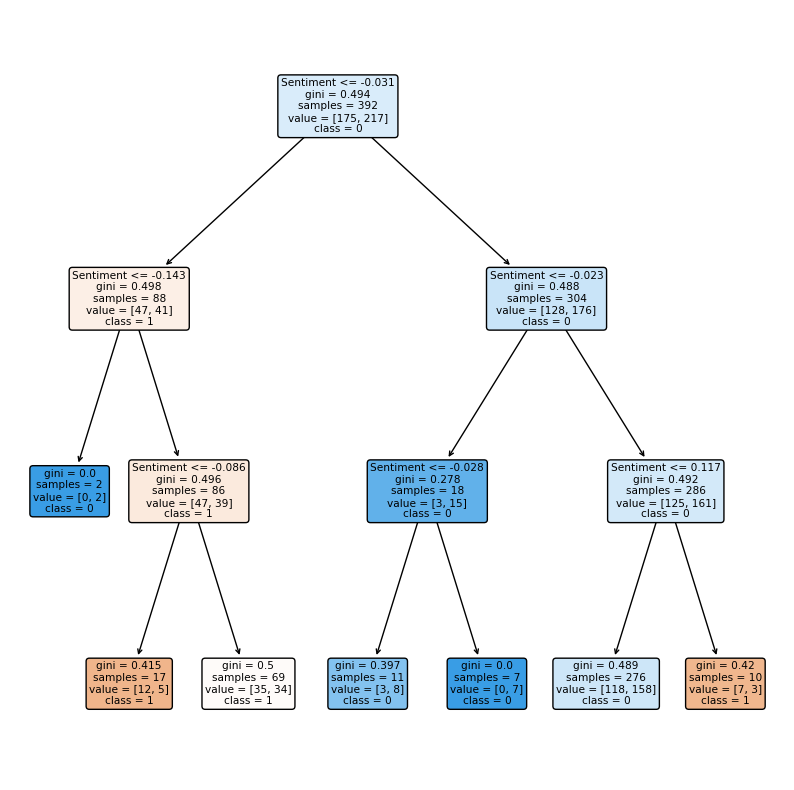

In [6]:
# Initialize the DecisionTreeClassifier
train_dectree3 = DecisionTreeClassifier(max_depth = 3)

# Train the model on the training data
train_dectree3.fit(X_train, y_train)

from sklearn.tree import plot_tree
#how to change the size of text??
f = plt.figure(figsize=(10,10))
plot_tree(train_dectree3, filled=True, rounded=True, 
          feature_names=["Sentiment"], 
          class_names=["1","0"])


train_dectree3.fit(X_test, y_test)

f = plt.figure(figsize=(10,10))
plot_tree(train_dectree3, filled=True, rounded=True, 
          feature_names=["Sentiment"], 
          class_names=["1","0"])

Classification Accuracy of Train Set	: 0.5201021059349075
Classification Accuracy of Test Set	: 0.5841836734693877

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.31      0.40       175
           1       0.59      0.81      0.68       217

    accuracy                           0.58       392
   macro avg       0.58      0.56      0.54       392
weighted avg       0.58      0.58      0.56       392



Text(0.5, 1.0, 'Test Confusion Matrix')

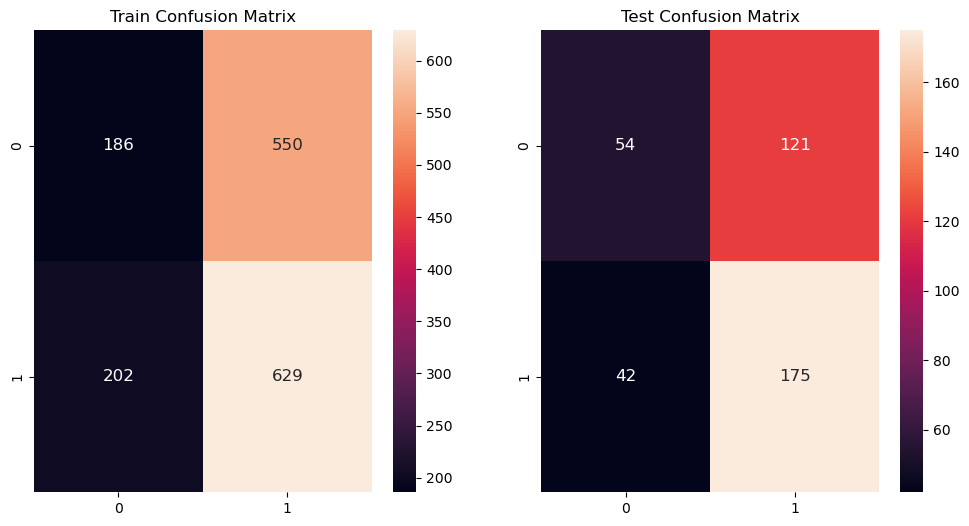

In [7]:
# Use the trained model to make predictions on the test data
y_train_pred = train_dectree3.predict(X_train)
y_test_pred = train_dectree3.predict(X_test)

print("Classification Accuracy of Train Set\t:", train_dectree3.score(X_train, y_train))
print("Classification Accuracy of Test Set\t:", train_dectree3.score(X_test, y_test))


# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

#Confusion Matrix for Train and Test Set
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 12}, ax=ax1)
# axes[0].plot(p1)
ax1.set_title("Train Confusion Matrix")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size":12}, ax=ax2)
ax2.set_title("Test Confusion Matrix")



In [8]:
y_train_tn, y_train_fp, y_train_fn, y_train_tp = confusion_matrix(y_train, y_train_pred).ravel()
y_train_tpr = y_train_tp / (y_train_tp + y_train_fn)
y_train_fpr =y_train_fp / (y_train_fp + y_train_tn)

y_test_tn, y_test_fp, y_test_fn, y_test_tp = confusion_matrix(y_test, y_test_pred).ravel()
y_test_tpr = y_test_tp / (y_test_tp + y_test_fn)
y_test_fpr = y_test_fp / (y_test_fp + y_test_tn)
print("True Positive Rate (train) : ", y_train_tpr)
print("False Positive Rate (Train): ", y_train_fpr)

print("\nTrue Positive Rate (Test)  : ", y_test_tpr)
print("False Positive Rate (Test) : ", y_test_fpr)

True Positive Rate (train) :  0.7569193742478941
False Positive Rate (Train):  0.7472826086956522

True Positive Rate (Test)  :  0.8064516129032258
False Positive Rate (Test) :  0.6914285714285714


The sentiment score Decision Tree showed the best accuracy, but is still not effective enough in predicting the effects on stockprices

# Logistic Regression Model with uni-grams, bi-grams, tri-grams
We used logistic regression with TF-IDF (Term Frequency-Inverse Document Frequency) on different n-gram values.

In [9]:
#uni-grams
nvectorize = TfidfVectorizer(min_df=0.05, max_df=0.85,ngram_range=(1,1)) 
news_nvector = nvectorize.fit_transform(headlines_train_list)

news_nvector.shape

nmodel = lr.fit(news_nvector, headlines_train["Label"])

headlines_test_list = headlines_test['combined']
ntest_vector = nvectorize.transform(headlines_test_list)
npredictions = nmodel.predict(ntest_vector)

pd.crosstab(headlines_test["Label"], npredictions, rownames=["Actual"], colnames=["Predicted"])

accuracy2=accuracy_score(headlines_test['Label'], npredictions)
print(" Logistics Regression with Unigrams and TF-IDF:",accuracy2)

nwords = nvectorize.get_feature_names_out()
ncoefficients = nmodel.coef_.tolist()[0]
ncoef_df = pd.DataFrame({'Word' : nwords, 'Coefficient' : ncoefficients})
ncoef_df = ncoef_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
ncoef_df.head(10)

 Logistics Regression with Unigrams and TF-IDF: 0.5130784708249497


,Word,Coefficient
613,nigeria,1.119268
195,company,0.960125
897,territory,0.908437
179,cities,0.897916
791,seen,0.876321
931,troops,0.854022
398,hamas,0.847146
912,three,0.838991
335,force,0.834347
448,irish,0.809250


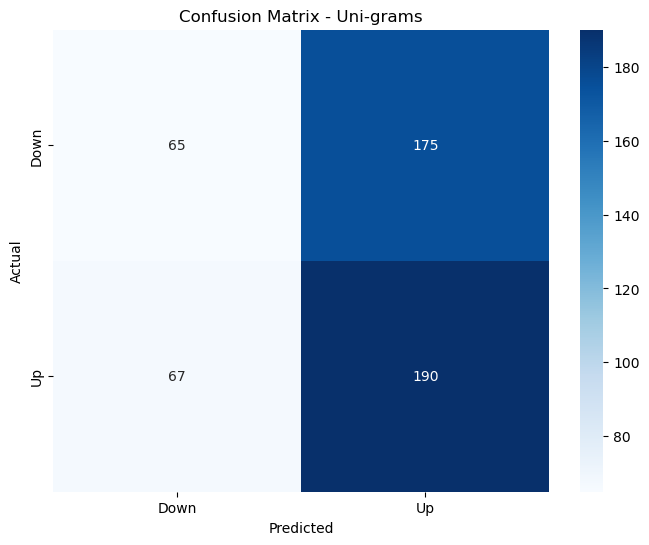

False Positive Rate (FPR): 0.7291666666666666
True Positive Rate (TPR) : 0.7392996108949417


In [10]:
# Generate confusion matrix
cm = confusion_matrix(headlines_test['Label'], npredictions)

plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix - Uni-grams')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

tn, fp, fn, tp = cm.ravel()

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)

# Print False Positive Rate (FPR) and True Positive Rate (TPR)
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR) :", tpr)

In [11]:
#bi-grams
nvectorize = TfidfVectorizer(min_df=0.05, max_df=0.85,ngram_range=(2,2)) #define the TF-IDF function
news_nvector = nvectorize.fit_transform(headlines_train_list)

news_nvector.shape

nmodel = lr.fit(news_nvector, headlines_train["Label"])

headlines_test_list = headlines_test['combined']
ntest_vector = nvectorize.transform(headlines_test_list)
npredictions = nmodel.predict(ntest_vector)

pd.crosstab(headlines_test["Label"], npredictions, rownames=["Actual"], colnames=["Predicted"])

accuracy2=accuracy_score(headlines_test['Label'], npredictions)
print(" Logistics Regression with Bigrams:",accuracy2)

nwords = nvectorize.get_feature_names_out()
ncoefficients = nmodel.coef_.tolist()[0]
ncoef_df = pd.DataFrame({'Word' : nwords, 'Coefficient' : ncoefficients})
ncoef_df = ncoef_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
ncoef_df.head()

 Logistics Regression with Bigrams: 0.5010060362173038


,Word,Coefficient
10,kills num,0.858475
14,new zealand,0.614745
25,num percent,0.576876
32,security forces,0.554286
6,first time,0.548799


In [12]:
#uni-grams and bi-grams
nvectorize = TfidfVectorizer(min_df=0.05, max_df=0.85,ngram_range=(3,3)) #define the TF-IDF function
news_nvector = nvectorize.fit_transform(headlines_train_list)

news_nvector.shape

nmodel = lr.fit(news_nvector, headlines_train["Label"])

headlines_test_list = headlines_test['combined']
ntest_vector = nvectorize.transform(headlines_test_list)
npredictions = nmodel.predict(ntest_vector)

pd.crosstab(headlines_test["Label"], npredictions, rownames=["Actual"], colnames=["Predicted"])

accuracy2=accuracy_score(headlines_test['Label'], npredictions)
print("Logistics Regression with Trigrams:",accuracy2)

nwords = nvectorize.get_feature_names_out()
ncoefficients = nmodel.coef_.tolist()[0]
ncoef_df = pd.DataFrame({'Word' : nwords, 'Coefficient' : ncoefficients})
ncoef_df = ncoef_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
ncoef_df.head()

Logistics Regression with Trigrams: 0.5171026156941649


,Word,Coefficient
0,num year old,-0.014032


In [30]:
#bi-grams
nvectorize = TfidfVectorizer(min_df=0.05, max_df=0.85,ngram_range=(1,2)) #define the TF-IDF function
news_nvector = nvectorize.fit_transform(headlines_train_list)

news_nvector.shape

nmodel = lr.fit(news_nvector, headlines_train["Label"])

headlines_test_list = headlines_test['combined']
ntest_vector = nvectorize.transform(headlines_test_list)
npredictions = nmodel.predict(ntest_vector)

pd.crosstab(headlines_test["Label"], npredictions, rownames=["Actual"], colnames=["Predicted"])

accuracy2=accuracy_score(headlines_test['Label'], npredictions)
print(" Logistics Regression with Unigrams AND Bigram and TF-IDF:",accuracy2)

nwords = nvectorize.get_feature_names_out()
ncoefficients = nmodel.coef_.tolist()[0]
ncoef_df = pd.DataFrame({'Word' : nwords, 'Coefficient' : ncoefficients})
ncoef_df = ncoef_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
ncoef_df.head()

 Logistics Regression with Unigrams AND Bigram and TF-IDF: 0.5110663983903421


,Word,Coefficient
628,nigeria,1.094505
199,company,0.949043
182,cities,0.896409
934,territory,0.894748
824,seen,0.865185


The logistic regression shows little accuracy in predicting the stock market movement.

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95,ngram_range=(1,2))
news_nvector = rf_vectorizer.fit_transform(headlines_train_list)

rf = RandomForestClassifier(random_state=54, n_estimators=500, criterion='entropy')
rfmodel = rf.fit(news_nvector, headlines_train["Label"])
headlines_test_list = headlines_test['combined']
ntest_vector = rf_vectorizer.transform(headlines_test_list)

rfpredictions = rfmodel.predict(ntest_vector)

Random forest with TF-IDF and bigram accuracy: 0.5171026156941649


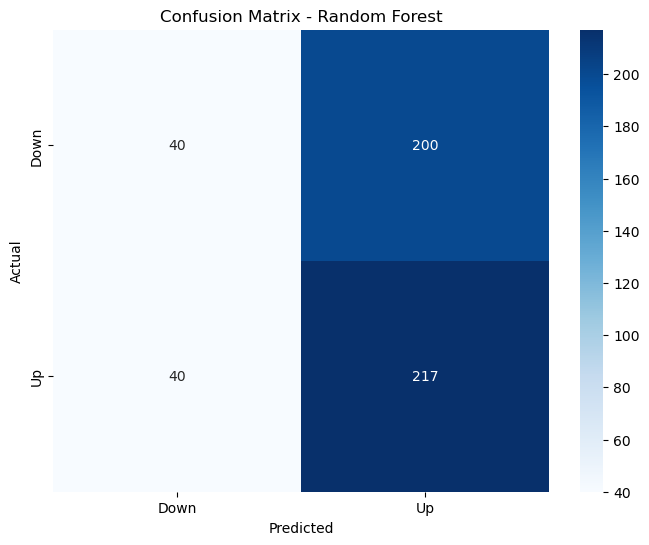

In [27]:
# Calculate accuracy
accuracyrf = accuracy_score(headlines_test['Label'], rfpredictions)
print("Random forest with TF-IDF and uni-gram and bigram accuracy:", accuracyrf)

# Generate confusion matrix
cm = confusion_matrix(headlines_test['Label'], rfpredictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
tn, fp, fn, tp = cm.ravel()

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)

# Print False Positive Rate (FPR) and True Positive Rate (TPR)
print("True Positive Rate (FPR):", tpr)
print("False Positive Rate (TPR) :", fpr)

True Positive Rate (FPR): 0.8443579766536965
False Positive Rate (TPR) : 0.8333333333333334


Random Forest on the TF-IDF matrix did nott yield amazing results

# Gradient Boosting

Gradient Boosting accuracy:  0.545271629778672


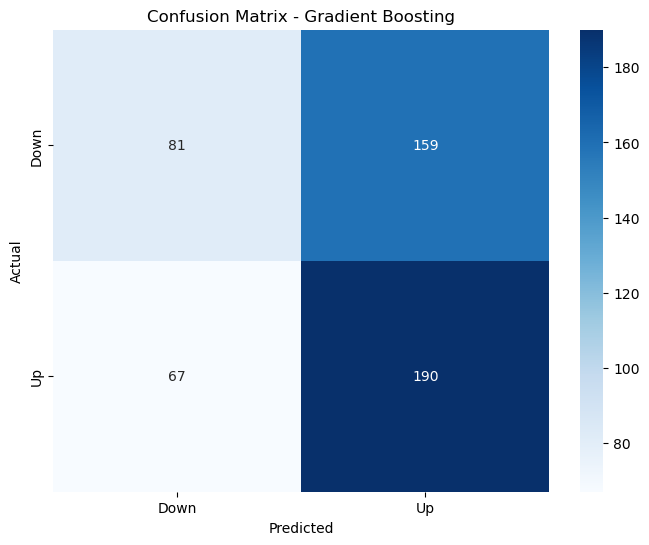

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
news_nvector = nvectorize.fit_transform(headlines_train_list)

gb = GradientBoostingClassifier(random_state=92)  
gbmodel = gb.fit(news_nvector, headlines_train["Label"])

headlines_test_list = headlines_test['combined']

ntest_vector = nvectorize.transform(headlines_test_list)

gbpredictions = gbmodel.predict(ntest_vector.toarray())
gbaccuracy = accuracy_score(headlines_test['Label'], gbpredictions)
print("Gradient Boosting accuracy: ", gbaccuracy)

# Create a confusion matrix
cm = confusion_matrix(headlines_test['Label'], gbpredictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

While Gradient Boosting performed better, the accuracy was not high enough to reliably predict stock price movement

The results shows that the stock market is influenced by numerous factors, such as politics and policies, global events, investor psychology, market speculation, etc. This highlights the complexity of financial markets.
While the project did not yield the desired predictive success, it provided valuable insights into the interplay between news sentiment and market behavior, paving the way for further research using more diverse data sources and advanced modeling techniques.